In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import seaborn as sns
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
# Cung cấp đường dẫn đầy đủ đến thư mục chứa file của bộ huấn luyện có tấn công và không tấn công
data_path_co = r"D:\baomathethong\021218_120h6sw__c1_ht5_it0_V2_csv_2ddos"
data_path_khong =r"D:\baomathethong\031218_100h6sw_c1_ht5_it0_V2_csv"

In [3]:
# File cần đọc
file_to_read = "flows-ok.csv"
file_to_read_khong ="flows-ok.csv"

In [4]:
# Đường dẫn đầy đủ đến file
full_path = os.path.join(data_path_co, file_to_read)
full_path_khong = os.path.join(data_path_khong, file_to_read_khong)

In [5]:
# Đọc file CSV vào DataFrame
#df = pd.read_csv(full_path, nrows=100)
#dfk = pd.read_csv(full_path_khong, nrows=1000)
df = pd.read_csv(full_path, nrows=10000)
dfk = pd.read_csv(full_path_khong, nrows=10000)

In [6]:
df

,Date flow start,Src IP Addr,Src Port,Dst IP Addr,Dst Port,Packets,Bytes,Duration in Seconds,Duration in Nano
0,01/01/1900 00:00,47.140.22.170,61663,10.0.0.29,80,3,276,1,875000000
1,01/01/1900 00:00,8.123.208.180,55246,10.0.0.16,22,3,276,1,874000000
2,01/01/1900 00:00,109.117.67.172,80,10.0.0.34,4000,3,351,1,846000000
3,01/01/1900 00:00,115.151.79.79,51319,10.0.0.26,8138,1,267,1,814000000
4,01/01/1900 00:00,197.22.182.238,2404,10.0.0.15,10530,3,426,1,753000000
...,...,...,...,...,...,...,...,...,...
9995,01/01/1900 00:02,23.108.129.115,161,10.0.0.72,16558,5,1085,3,402000000
9996,01/01/1900 00:02,131.7.127.95,80,10.0.0.11,443,5,1085,3,331000000
9997,01/01/1900 00:02,11.56.184.180,16853,10.0.0.56,22,5,1460,3,295000000
9998,01/01/1900 00:02,194.23.139.1,3071,10.0.0.50,22,4,468,3,25000000


In [7]:
dfk

,Date flow start,Src IP Addr,Src Port,Dst IP Addr,Dst Port,Packets,Bytes,Duration in Seconds,Duration in Nano
0,1900-01-01 00:00:00,160.133.147.99,53519,10.0.0.56,6378,3.0,576.0,1,410000000
1,1900-01-01 00:00:00,224.38.88.44,161,10.0.0.72,80,2.0,484.0,1,410000000
2,1900-01-01 00:00:00,182.176.248.83,3071,10.0.0.33,80,2.0,584.0,1,410000000
3,1900-01-01 00:00:01,160.133.147.99,53519,10.0.0.56,6378,4.0,768.0,2,510000000
4,1900-01-01 00:00:01,224.38.88.44,161,10.0.0.72,80,3.0,726.0,2,510000000
...,...,...,...,...,...,...,...,...,...
9995,1900-01-01 00:02:26,250.91.24.55,23886,10.0.0.14,29563,1.0,92.0,0,686000000
9996,1900-01-01 00:02:26,234.201.189.207,59002,10.0.0.4,29563,1.0,217.0,0,683000000
9997,1900-01-01 00:02:26,29.54.16.107,59002,10.0.0.85,80,1.0,92.0,0,678000000
9998,1900-01-01 00:02:26,239.98.82.60,55246,10.0.0.22,5078,1.0,117.0,0,630000000


In [8]:
# Ghép hai tập tin lại thành một DataFrame lớn
combined_df = pd.concat([df, dfk], ignore_index=True)

In [9]:
combined_df

,Date flow start,Src IP Addr,Src Port,Dst IP Addr,Dst Port,Packets,Bytes,Duration in Seconds,Duration in Nano
0,01/01/1900 00:00,47.140.22.170,61663,10.0.0.29,80,3.0,276.0,1,875000000
1,01/01/1900 00:00,8.123.208.180,55246,10.0.0.16,22,3.0,276.0,1,874000000
2,01/01/1900 00:00,109.117.67.172,80,10.0.0.34,4000,3.0,351.0,1,846000000
3,01/01/1900 00:00,115.151.79.79,51319,10.0.0.26,8138,1.0,267.0,1,814000000
4,01/01/1900 00:00,197.22.182.238,2404,10.0.0.15,10530,3.0,426.0,1,753000000
...,...,...,...,...,...,...,...,...,...
19995,1900-01-01 00:02:26,250.91.24.55,23886,10.0.0.14,29563,1.0,92.0,0,686000000
19996,1900-01-01 00:02:26,234.201.189.207,59002,10.0.0.4,29563,1.0,217.0,0,683000000
19997,1900-01-01 00:02:26,29.54.16.107,59002,10.0.0.85,80,1.0,92.0,0,678000000
19998,1900-01-01 00:02:26,239.98.82.60,55246,10.0.0.22,5078,1.0,117.0,0,630000000


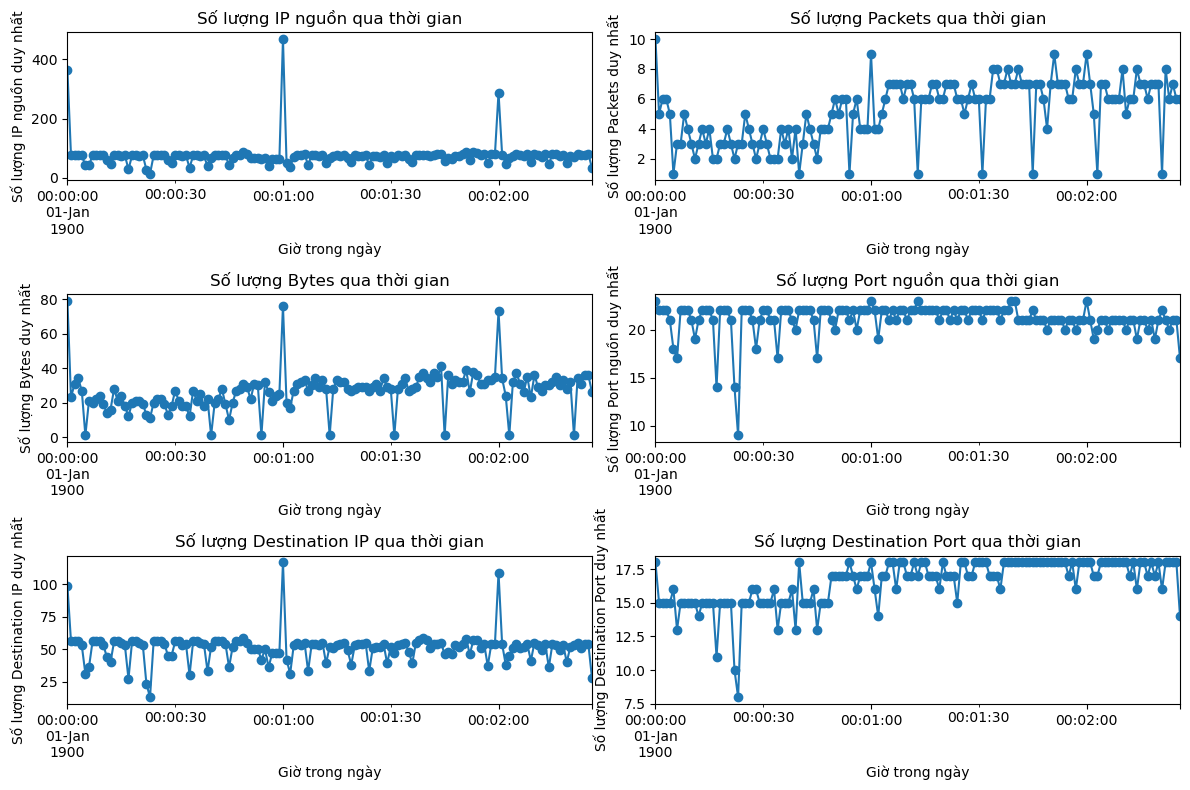

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
combined_df['Date flow start'] = pd.to_datetime(combined_df['Date flow start'], format='mixed', dayfirst=True)
# Chuyển đổi cột 'Timestamp' sang định dạng datetime
#combined_df_1['Date flow start'] = pd.to_datetime(combined_df_1['Date flow start'])

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giờ
df_grouped_1 = combined_df.groupby(pd.Grouper(key='Date flow start', freq='1S'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giờ
df_summary_1 = df_grouped_1['Src IP Addr'].nunique()
df_summary_2 = df_grouped_1['Packets'].nunique()
df_summary_3 = df_grouped_1['Bytes'].nunique()
df_summary_4 = df_grouped_1['Src Port'].nunique()
df_summary_5 = df_grouped_1['Dst IP Addr'].nunique()
df_summary_6 = df_grouped_1['Dst Port'].nunique()

# Vẽ từng biểu đồ riêng lẻ
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
df_summary_1.plot(kind='line', marker='o')
plt.title('Số lượng IP nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng IP nguồn duy nhất')

plt.subplot(3, 2, 2)
df_summary_2.plot(kind='line', marker='o')
plt.title('Số lượng Packets qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Packets duy nhất')

plt.subplot(3, 2, 3)
df_summary_3.plot(kind='line', marker='o')
plt.title('Số lượng Bytes qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Bytes duy nhất')

plt.subplot(3, 2, 4)
df_summary_4.plot(kind='line', marker='o')
plt.title('Số lượng Port nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Port nguồn duy nhất')

plt.subplot(3, 2, 5)
df_summary_5.plot(kind='line', marker='o')
plt.title('Số lượng Destination IP qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination IP duy nhất')

plt.subplot(3, 2, 6)
df_summary_6.plot(kind='line', marker='o')
plt.title('Số lượng Destination Port qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination Port duy nhất')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


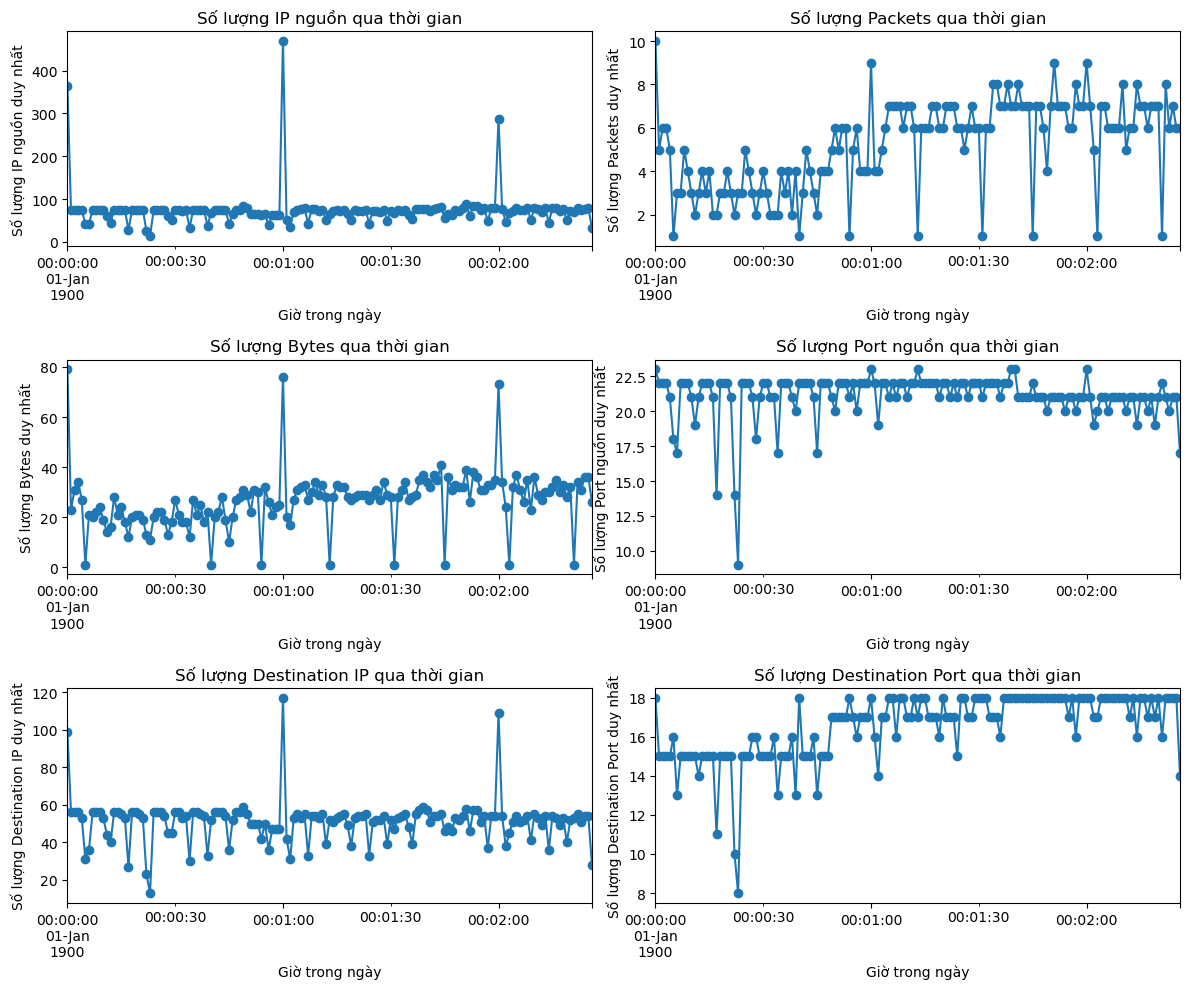

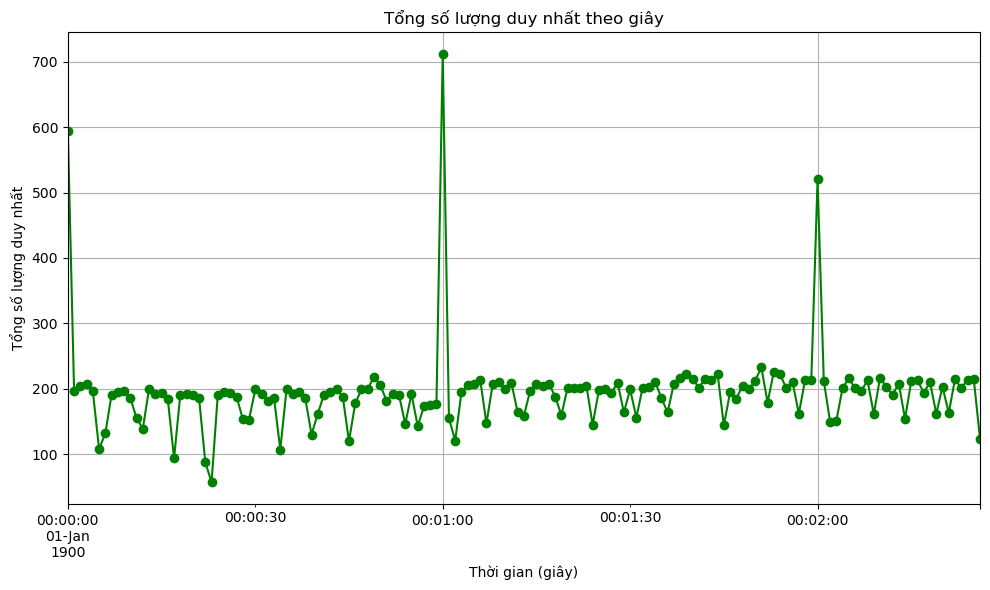

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Timestamp' sang định dạng datetime
combined_df['Date flow start'] = pd.to_datetime(combined_df['Date flow start'], format='mixed', dayfirst=True)

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giây (1S)
df_grouped_1 = combined_df.groupby(pd.Grouper(key='Date flow start', freq='1S'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giây
df_summary_1 = df_grouped_1['Src IP Addr'].nunique()
df_summary_2 = df_grouped_1['Packets'].nunique()
df_summary_3 = df_grouped_1['Bytes'].nunique()
df_summary_4 = df_grouped_1['Src Port'].nunique()
df_summary_5 = df_grouped_1['Dst IP Addr'].nunique()
df_summary_6 = df_grouped_1['Dst Port'].nunique()

## Tính toán số lượng duy nhất cho 'Src IP Addr' và 'Packets' trong mỗi giây
df_summary = df_grouped_1[['Src IP Addr', 'Packets','Bytes','Src Port','Dst IP Addr','Dst Port']].nunique()

# Tính tổng điểm của các số lượng duy nhất theo giây
total_score = df_summary.sum(axis=1)
# Vẽ từng biểu đồ riêng lẻ
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
df_summary_1.plot(kind='line', marker='o')
plt.title('Số lượng IP nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng IP nguồn duy nhất')

plt.subplot(3, 2, 2)
df_summary_2.plot(kind='line', marker='o')
plt.title('Số lượng Packets qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Packets duy nhất')

plt.subplot(3, 2, 3)
df_summary_3.plot(kind='line', marker='o')
plt.title('Số lượng Bytes qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Bytes duy nhất')

plt.subplot(3, 2, 4)
df_summary_4.plot(kind='line', marker='o')
plt.title('Số lượng Port nguồn qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Port nguồn duy nhất')

plt.subplot(3, 2, 5)
df_summary_5.plot(kind='line', marker='o')
plt.title('Số lượng Destination IP qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination IP duy nhất')

plt.subplot(3, 2, 6)
df_summary_6.plot(kind='line', marker='o')
plt.title('Số lượng Destination Port qua thời gian')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng Destination Port duy nhất')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()

# Vẽ biểu đồ tổng theo giây
plt.figure(figsize=(10, 6))
total_score.plot(kind='line', marker='o', color='green')
plt.title('Tổng số lượng duy nhất theo giây')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Tổng số lượng duy nhất')
plt.grid(True)
plt.tight_layout()
plt.show()

# Hiển thị biểu đồ
plt.show()


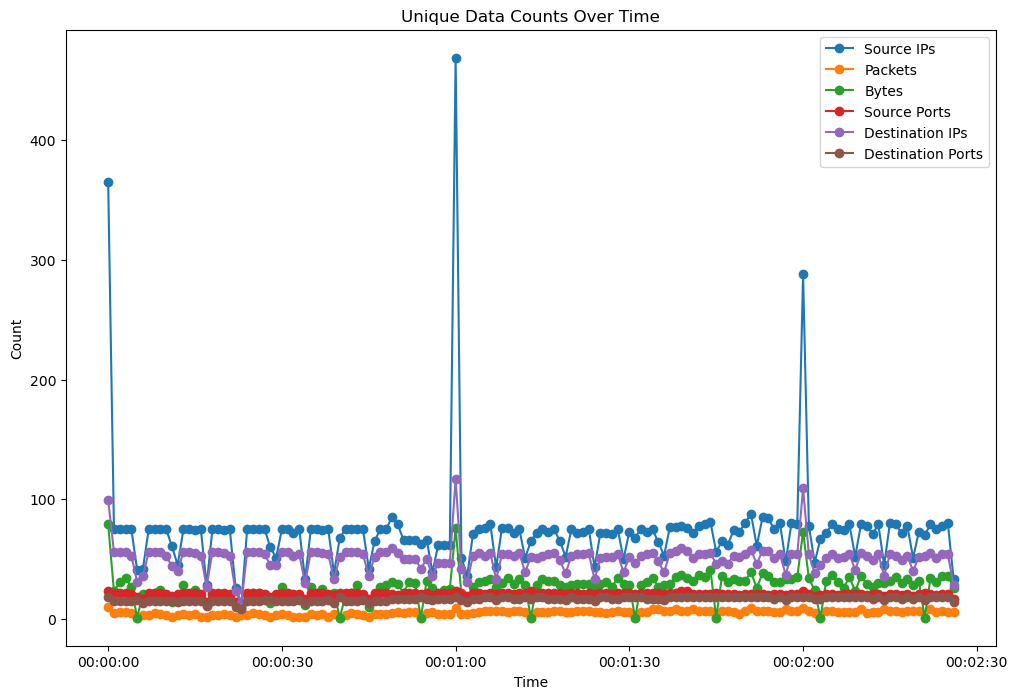

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử combined_df_1 là DataFrame của bạn với cột 'Date flow start' đã được chuyển đổi thành datetime
# và selected_features là các tính năng bạn đã chọn
selected_features = ['Packets', 'Bytes','Src IP Addr','Dst IP Addr','Src Port','Dst Port']

# Tạo nhóm dựa trên timestamp với tần suất là mỗi giây (1S)
df_grouped_1 = combined_df.groupby(pd.Grouper(key='Date flow start', freq='1S'))

# Tính toán số lượng duy nhất cho mỗi loại dữ liệu trong mỗi giây
df_summary_1 = df_grouped_1['Src IP Addr'].nunique()
df_summary_2 = df_grouped_1['Packets'].nunique()
df_summary_3 = df_grouped_1['Bytes'].nunique()
df_summary_4 = df_grouped_1['Src Port'].nunique()
df_summary_5 = df_grouped_1['Dst IP Addr'].nunique()
df_summary_6 = df_grouped_1['Dst Port'].nunique()

# Vẽ tất cả các biểu đồ trên cùng một hình ảnh
plt.figure(figsize=(12, 8))

# Vẽ số lượng IP nguồn qua thời gian
plt.plot(df_summary_1.index, df_summary_1, label='Source IPs', marker='o')

# Vẽ số lượng Packets qua thời gian
plt.plot(df_summary_2.index, df_summary_2, label='Packets', marker='o')

# Vẽ số lượng Bytes qua thời gian
plt.plot(df_summary_3.index, df_summary_3, label='Bytes', marker='o')

# Vẽ số lượng Port nguồn qua thời gian
plt.plot(df_summary_4.index, df_summary_4, label='Source Ports', marker='o')

# Vẽ số lượng Destination IP qua thời gian
plt.plot(df_summary_5.index, df_summary_5, label='Destination IPs', marker='o')

# Vẽ số lượng Destination Port qua thời gian
plt.plot(df_summary_6.index, df_summary_6, label='Destination Ports', marker='o')

# Đặt tiêu đề và nhãn trục
plt.title('Unique Data Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Count')

# Thêm chú thích
plt.legend()

# Hiển thị đồ thị
plt.show()


In [21]:
# Initialize counters to track attack detection
ddos_count = 0
portscan_count = 0
normal_traffic_count = 0

# Iterate over the DataFrame
for index, row in combined_df.iterrows():
    packets = int(row['Packets'])
    bytes_transferred = int(row['Bytes'])
    duration_seconds = float(row['Duration in Seconds'])
    duration_nano = float(row['Duration in Nano'])
    src_ip = row['Src IP Addr']
    dst_ip = row['Dst IP Addr']
    dst_port = int(row['Dst Port'])

    # Detect DDoS attack
    if packets > 5 and duration_seconds > 2:
        #print(f"Potential DDoS attack detected from {src_ip} to {dst_ip} on port {dst_port}.")
        # Increment DDoS counter
        ddos_count += 1
    # Detect portscan
    elif packets < 10 and duration_seconds < 1 and bytes_transferred < 1000:
        #print(f"Potential portscan detected from {src_ip} to {dst_ip} on port {dst_port}.")
        # Increment portscan counter
        portscan_count += 1
    else:
        # Increment normal traffic counter
        normal_traffic_count += 1

# Print counts
print(f"DDoS: {ddos_count}")
print(f"Portscan:  {portscan_count}")
print(f"Normal: {normal_traffic_count}")
print(f"Tổng: {normal_traffic_count+portscan_count+ddos_count}")


DDoS: 5091
Portscan:  3394
Normal: 11515
Tổng: 20000


In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV hoặc DataFrame đã có
# Giả sử df là DataFrame chứa dữ liệu luồng
# Ví dụ: df = pd.read_csv('data.csv')

# Ví dụ:
data = {
    'Src IP Addr': ['192.168.1.1', '192.168.1.2', '192.168.1.3', '192.168.1.4', '192.168.1.5'],
    'Dst IP Addr': ['10.0.0.1', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5'],
    'Dst Port': [80, 443, 8080, 22, 3389]
}
df = pd.DataFrame(data)

# Tính số lượng luồng từ mỗi cặp địa chỉ IP và cổng
flow_count = df.groupby(['Src IP Addr', 'Dst IP Addr', 'Dst Port']).size().reset_index(name='Count')

# Sắp xếp các luồng theo số lượng giảm dần
flow_count = flow_count.sort_values(by='Count', ascending=False)

# Lấy ra các luồng có số lượng lớn hơn ngưỡng (có thể thay đổi)
threshold = 3  # Ngưỡng
suspicious_flows = flow_count[flow_count['Count'] > threshold]

# Hiển thị các luồng nghi ngờ
print("Các luồng nghi ngờ:")
print(suspicious_flows)


In [22]:
# Initialize sets to store unique source and destination IPs
unique_src_ips = set()
unique_dst_ips = set()

# Iterate over the DataFrame
for index, row in combined_df.iterrows():
    src_ip = row['Src IP Addr']
    dst_ip = row['Dst IP Addr']
    
    # Add source and destination IPs to the respective sets
    unique_src_ips.add(src_ip)
    unique_dst_ips.add(dst_ip)

# Print counts
print(f"Number of unique source IPs: {len(unique_src_ips)}")
print(f"Number of unique destination IPs: {len(unique_dst_ips)}")


Number of unique source IPs: 1164
Number of unique destination IPs: 118


In [23]:
# Initialize counters to track attack detection
ddos_count = 0
portscan_count = 0
normal_traffic_count = 0

# Iterate over the DataFrame
for index, row in combined_df.iterrows():
    packets = int(row['Packets'])
    bytes_transferred = int(row['Bytes'])
    duration_seconds = float(row['Duration in Seconds'])
    duration_nano = float(row['Duration in Nano'])
    src_ip = row['Src IP Addr']
    dst_ip = row['Dst IP Addr']
    dst_port = int(row['Dst Port'])

    # Calculate the number of unique destination IPs
    unique_dst_ips = len(set(combined_df['Dst IP Addr']))

    # Detect DDoS attack
    if packets > 1000 and unique_dst_ips > 100:
        # Increment DDoS counter
        ddos_count += 1
    # Detect portscan
    elif packets < 100 and unique_dst_ips > 50:
        # Increment portscan counter
        portscan_count += 1
    else:
        # Increment normal traffic counter
        normal_traffic_count += 1

# Print counts
print(f"DDoS count: {ddos_count}")
print(f"Portscan count: {portscan_count}")
print(f"Normal traffic count: {normal_traffic_count}")


DDoS count: 0
Portscan count: 20000
Normal traffic count: 0


In [24]:
# Đánh dấu dữ liệu từ tập tin có tấn công
df['label'] = 1
# Đánh dấu dữ liệu từ tập tin không có tấn công
dfk['label'] = 0

# Ghép hai tập tin lại thành một DataFrame lớn
combined_df = pd.concat([df, dfk], ignore_index=True)
combined_df_1 = pd.concat([df, dfk], ignore_index=True)

In [25]:
combined_df

,Date flow start,Src IP Addr,Src Port,Dst IP Addr,Dst Port,Packets,Bytes,Duration in Seconds,Duration in Nano,label
0,01/01/1900 00:00,47.140.22.170,61663,10.0.0.29,80,3.0,276.0,1,875000000,1
1,01/01/1900 00:00,8.123.208.180,55246,10.0.0.16,22,3.0,276.0,1,874000000,1
2,01/01/1900 00:00,109.117.67.172,80,10.0.0.34,4000,3.0,351.0,1,846000000,1
3,01/01/1900 00:00,115.151.79.79,51319,10.0.0.26,8138,1.0,267.0,1,814000000,1
4,01/01/1900 00:00,197.22.182.238,2404,10.0.0.15,10530,3.0,426.0,1,753000000,1
...,...,...,...,...,...,...,...,...,...,...
19995,1900-01-01 00:02:26,250.91.24.55,23886,10.0.0.14,29563,1.0,92.0,0,686000000,0
19996,1900-01-01 00:02:26,234.201.189.207,59002,10.0.0.4,29563,1.0,217.0,0,683000000,0
19997,1900-01-01 00:02:26,29.54.16.107,59002,10.0.0.85,80,1.0,92.0,0,678000000,0
19998,1900-01-01 00:02:26,239.98.82.60,55246,10.0.0.22,5078,1.0,117.0,0,630000000,0


In [ ]:
combined_df_1 

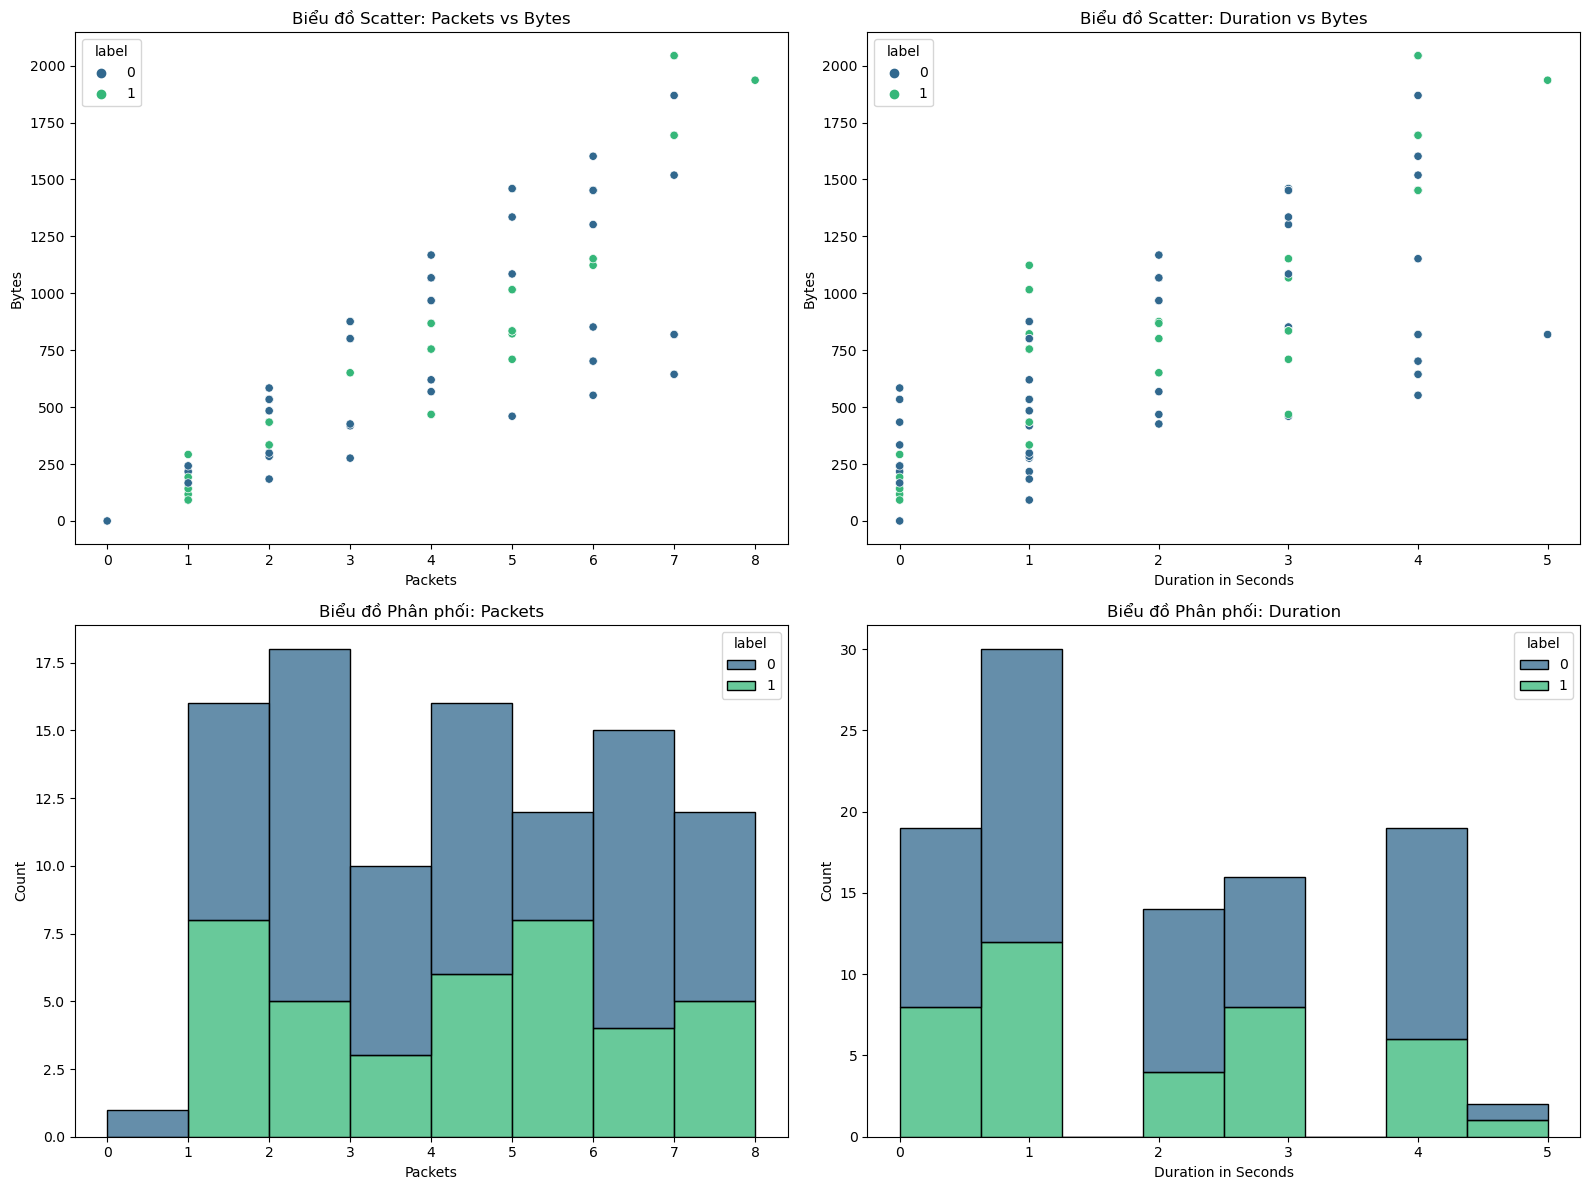

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn một số điểm dữ liệu ít hơn (đổi số 1000 thành số bạn muốn)
sampled_data = combined_df.sample(n=100, random_state=42)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Biểu đồ scatter plot cho mối quan hệ giữa 'Packets' và 'Bytes'
sns.scatterplot(x='Packets', y='Bytes', hue='label', data=sampled_data, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Biểu đồ Scatter: Packets vs Bytes')

# Biểu đồ scatter plot cho mối quan hệ giữa 'Duration in Seconds' và 'Bytes'
sns.scatterplot(x='Duration in Seconds', y='Bytes', hue='label', data=sampled_data, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Biểu đồ Scatter: Duration vs Bytes')

# Biểu đồ phân phối của 'Packets' theo nhãn tấn công
sns.histplot(data=sampled_data, x='Packets', hue='label', multiple='stack', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Biểu đồ Phân phối: Packets')

# Biểu đồ phân phối của 'Duration in Seconds' theo nhãn tấn công
sns.histplot(data=sampled_data, x='Duration in Seconds', hue='label', multiple='stack', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Biểu đồ Phân phối: Duration')

# Đảm bảo các đồ thị không chồng lên nhau
plt.tight_layout()
plt.show()


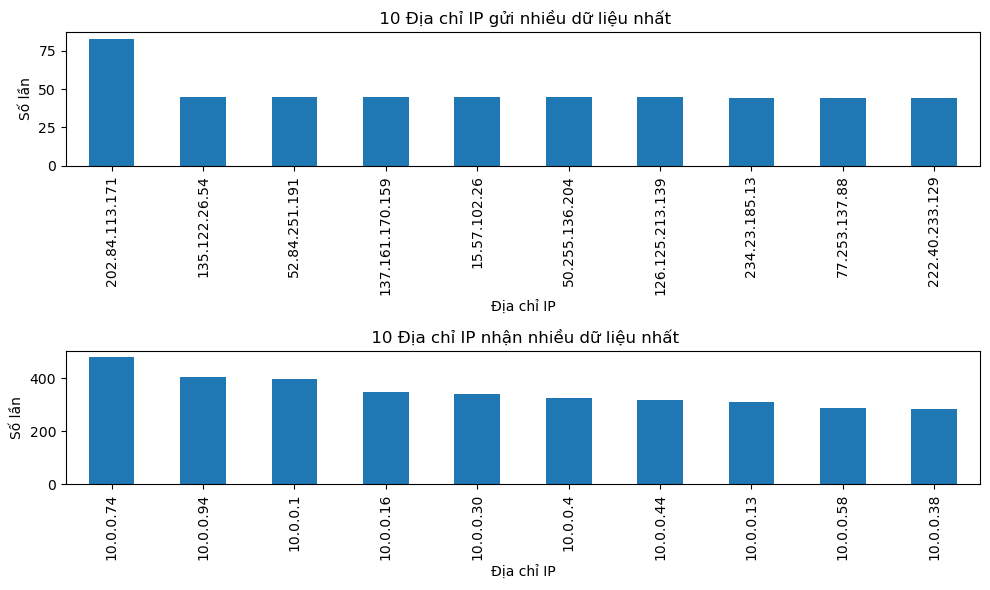

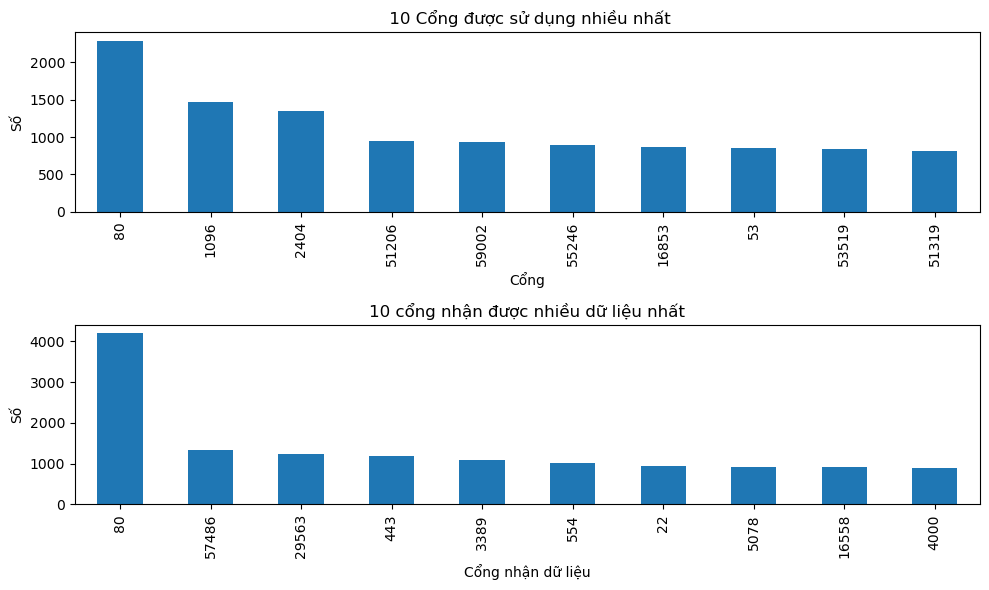

In [27]:
# Phân tích theo địa chỉ IP
plt.figure(figsize=(10, 6))

# Địa chỉ IP gửi nhiều dữ liệu nhất
plt.subplot(2, 1, 1)
source_ip_addresses = combined_df["Src IP Addr"].value_counts().head(10)
source_ip_addresses.plot(kind='bar')
plt.title(' 10 Địa chỉ IP gửi nhiều dữ liệu nhất')
plt.xlabel('Địa chỉ IP')
plt.ylabel('Số lần')

# Địa chỉ IP nhận nhiều dữ liệu nhất
plt.subplot(2, 1, 2)
destination_ip_addresses = combined_df["Dst IP Addr"].value_counts().head(10)
destination_ip_addresses.plot(kind='bar')
plt.title(' 10 Địa chỉ IP nhận nhiều dữ liệu nhất')
plt.xlabel('Địa chỉ IP')
plt.ylabel('Số lần')

plt.tight_layout()
plt.show()

# Phân tích theo cổng
plt.figure(figsize=(10, 6))

# Cổng được sử dụng nhiều nhất
plt.subplot(2, 1, 1)
source_ports = combined_df["Src Port"].value_counts().head(10)
source_ports.plot(kind='bar')
plt.title(' 10 Cổng được sử dụng nhiều nhất')
plt.xlabel('Cổng')
plt.ylabel('Số')

# Cổng nhận nhiều dữ liệu nhất
plt.subplot(2, 1, 2)
destination_ports = combined_df["Dst Port"].value_counts().head(10)
destination_ports.plot(kind='bar')
plt.title('10 cổng nhận được nhiều dữ liệu nhất')
plt.xlabel('Cổng nhận dữ liệu')
plt.ylabel('Số')

plt.tight_layout()
plt.show()

In [28]:
combined_df.isna().sum()

Date flow start        0
Src IP Addr            0
Src Port               0
Dst IP Addr            0
Dst Port               0
Packets                0
Bytes                  0
Duration in Seconds    0
Duration in Nano       0
label                  0
dtype: int64

In [29]:
combined_df.duplicated().sum()

5

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date flow start      20000 non-null  object 
 1   Src IP Addr          20000 non-null  object 
 2   Src Port             20000 non-null  int64  
 3   Dst IP Addr          20000 non-null  object 
 4   Dst Port             20000 non-null  int64  
 5   Packets              20000 non-null  float64
 6   Bytes                20000 non-null  float64
 7   Duration in Seconds  20000 non-null  int64  
 8   Duration in Nano     20000 non-null  int64  
 9   label                20000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.5+ MB


In [31]:


selected_features = ['Packets', 'Bytes','Src IP Addr','Dst IP Addr','Src Port','Dst Port']
X = combined_df[selected_features]
y = combined_df['label']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu

# Xác định tên các cột không phải là số
non_numeric_columns = ['Src IP Addr', 'Dst IP Addr']

# Mã hóa one-hot cho các cột không phải là số trong tập huấn luyện
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns)

# Mã hóa one-hot cho các cột không phải là số trong tập kiểm thử
X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_columns)

# Đảm bảo cả hai tập dữ liệu có cùng tên cột sau khi mã hóa one-hot
common_columns = list(set(X_train_encoded.columns) & set(X_test_encoded.columns))
X_train_encoded = X_train_encoded[common_columns]
X_test_encoded = X_test_encoded[common_columns]

# Áp dụng StandardScaler cho dữ liệu đã mã hóa
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)



In [32]:
#fuzzy_lstm
# Định hình lại dữ liệu cho LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [33]:
# tạo LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

In [34]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Đào tạo model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
394/394 [==============================] - 115s 292ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 2/10
394/394 [==============================] - 115s 291ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 3/10
394/394 [==============================] - 99s 251ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 4/10
394/394 [==============================] - 92s 234ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 5/10
394/394 [==============================] - 91s 232ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 6/10
394/394 [==============================] - 95s 241ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 7/10
394/394 [==============================] - 91s 231ms/step - loss: nan - accuracy: 0.5027 - val_loss: nan - val_accuracy: 0.4879
Epoch 8/10
394/394 [=====

In [37]:
y_pred_fuzzy_lstm = (model.predict(X_test_reshaped) > 0.5).astype("int32")

188/188 [==============================] - 14s 72ms/step


In [38]:
# Giả sử y_true là giá trị thực tế, và y_pred là giá trị dự đoán
accuracy_fuzzy_lstm = accuracy_score(y_test, y_pred_fuzzy_lstm)
print("Accuracy:", accuracy_fuzzy_lstm)

Accuracy: 0.49716666666666665


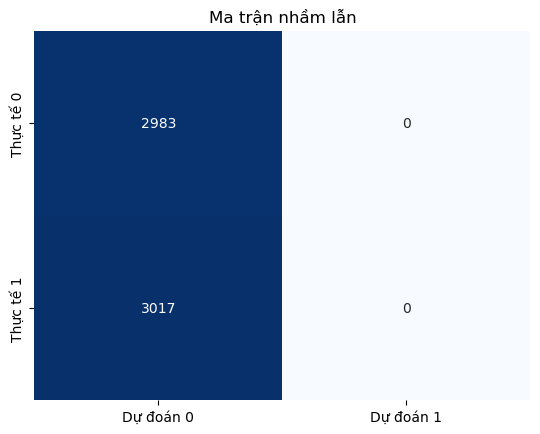

In [39]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_fuzzy_lstm)

# Vẽ biểu đồ ma trận nhầm lẫn bằng Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Dự đoán 0", "Dự đoán 1"],
            yticklabels=["Thực tế 0", "Thực tế 1"])

plt.title("Ma trận nhầm lẫn")
plt.show()

In [40]:
# Xác định hàm 
def define_membership_functions(x):
    x_low = fuzz.trimf(x, [0, 0, 0.5])
    x_medium = fuzz.trimf(x, [0, 0.5, 1])
    x_high = fuzz.trimf(x, [0.5, 1, 1])
    return x_low, x_medium, x_high

In [41]:
# Áp dụng cá thành phần của hàm
fuzzy_values = define_membership_functions(y_test)

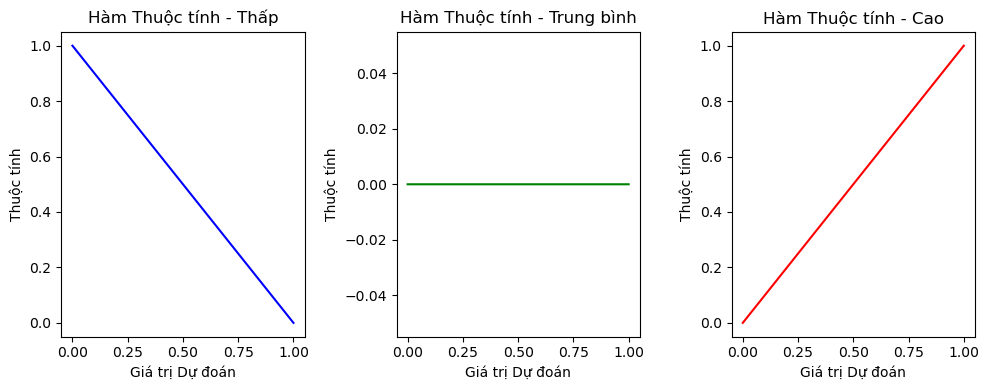

In [42]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.plot(y_test, fuzzy_values[0], 'b', linewidth=1.5, label='Thấp')
plt.title('Hàm Thuộc tính - Thấp')
plt.xlabel('Giá trị Dự đoán')
plt.ylabel('Thuộc tính')

plt.subplot(1, 3, 2)
plt.plot(y_test, fuzzy_values[1], 'g', linewidth=1.5, label='Trung bình')
plt.title('Hàm Thuộc tính - Trung bình')
plt.xlabel('Giá trị Dự đoán')
plt.ylabel('Thuộc tính')

plt.subplot(1, 3, 3)
plt.plot(y_test, fuzzy_values[2], 'r', linewidth=1.5, label='Cao')
plt.title('Hàm Thuộc tính - Cao')
plt.xlabel('Giá trị Dự đoán')
plt.ylabel('Thuộc tính')

plt.tight_layout()
plt.show()

In [43]:
def fuzzy_rules(low, medium, high):
    # Xác định luật mờ dựa trên giá trị thành viên
    # Thêm các quy tắc mờ 
    result = np.full_like(low, "Không Tấn Công", dtype='str')

    # Apply fuzzy rules
    result[high > 0.5] = "High"
    result[(medium > 0.5) & (result == "Không Tấn Công")] = "Medium"
    result[(low > 0.5) & (result == "Không Tấn Công")] = "Low"
    
    return result
plt.show()


In [44]:
# Áp dụng quy tắc mờ cho giá trị mờ
result = fuzzy_rules(fuzzy_values[0], fuzzy_values[1], fuzzy_values[2])

In [45]:
#Các trường hợp với 'H': Quy tắc mờ xác định rằng giá trị thành viên cho "Cao" lớn hơn 0.5 cho những trường hợp này, và chúng được phân loại là "Cao".

#Các trường hợp với 'N': Quy tắc mờ không tìm thấy bất kỳ điều kiện nào để "Cao" được đáp ứng, vì vậy phân loại mặc định "Không tấn công" được gán cho những trường hợp này.
# Print the result
print("Fuzzy Result:", result)

Fuzzy Result: ['K' 'H' 'H' ... 'K' 'K' 'H']


In [46]:
result_binary = np.where(result == 'H', 1, 0)

In [47]:
# độ chính xác
accuracy_fuzzy_lstm_1 = np.sum(result_binary == y_test) / len(y_test)

# in
print("Accuracy:", accuracy_fuzzy_lstm_1)

Accuracy: 1.0


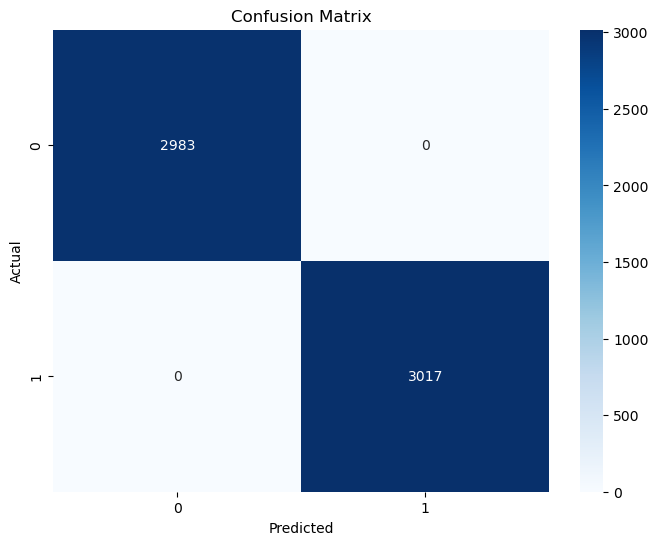

In [48]:
# y_test là nhãn thực và result_binary là nhãn được dự đoán
cm = confusion_matrix(y_test, result_binary)

# Tạo ma trận matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC (lstm_fuzzy): 1.0


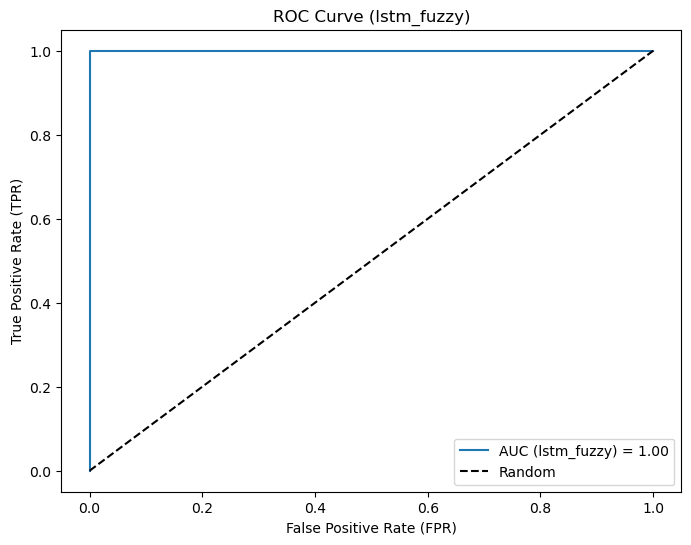

In [49]:
# Tính AUC
auc_lstm_fuzzy = roc_auc_score(y_test, result_binary)
print("AUC (lstm_fuzzy):", auc_lstm_fuzzy)

# Vẽ đường cong ROC
fpr_lstm_fuzzy, tpr_lstm_fuzzy, thresholds_lstm_fuzzy = roc_curve(y_test, result_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm_fuzzy, tpr_lstm_fuzzy, label=f'AUC (lstm_fuzzy) = {auc_lstm_fuzzy:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (lstm_fuzzy)')
plt.legend()
plt.show()

In [50]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fuzzy_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_fuzzy_lstm))

Confusion Matrix:
 [[2983    0]
 [3017    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.66      2983
           1       0.00      0.00      0.00      3017

    accuracy                           0.50      6000
   macro avg       0.25      0.50      0.33      6000
weighted avg       0.25      0.50      0.33      6000



D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
def differentiate_attacks(X_test_reshaped, y_pred_fuzzy_lstm):
    ddos_indices = np.where(y_pred_fuzzy_lstm == 1)[0]  # Lấy chỉ số của các trường hợp dự đoán là DDoS
    portscan_indices = np.where(y_pred_fuzzy_lstm == 0)[0]  # Lấy chỉ số của các trường hợp dự đoán là portscan
    
    ddos_traffic = X_test_reshaped[ddos_indices]  # Lấy lưu lượng truy cập của các trường hợp DDoS
    portscan_traffic = X_test_reshaped[portscan_indices]  # Lấy lưu lượng truy cập của các trường hợp portscan
    
    # Phân tích các thuộc tính của lưu lượng truy cập của từng loại tấn công
    ddos_traffic_mean_bytes = np.mean(ddos_traffic[:, 1])  # Lượng bytes trung bình của DDoS
    portscan_traffic_mean_ports = np.mean(portscan_traffic[:, 5])  # Số cổng trung bình của portscan
    
    # So sánh các thuộc tính để xác định loại tấn công
    if ddos_traffic_mean_bytes > portscan_traffic_mean_ports:
        print("Dự đoán là tấn công DDoS")
    else:
        print("Dự đoán là tấn công portscan")

In [52]:
#1. Giảm thiểu tấn công DDoS
def mitigate_ddos(X_test_reshaped, y_pred_fuzzy_lstm):
    # Lấy danh sách các địa chỉ IP nguồn xuất hiện nhiều nhất trong các luồng đáng ngờ và cùng cổng đích
    ddos_indices = np.where(y_pred_fuzzy_lstm == 1)[0]  # Lấy chỉ số của các trường hợp dự đoán là DDoS
    ddos_ips = X_test_reshaped[ddos_indices, 2]  # Lấy địa chỉ IP nguồn tương ứng từ cột 'Src IP Addr' trong X_test
    ddos_ports = X_test_reshaped[ddos_indices, 5]
    
    for ip, port in zip(ddos_ips, ddos_ports):
        # Thực hiện các biện pháp giảm thiểu tấn công DDoS, ví dụ: chặn lưu lượng từ các IP này
        # có thể sử dụng các công cụ như iptables để thực hiện việc chặn IP
        print(f"Chặn lưu lượng tấn công DDOS từ địa chỉ IP nghi ngờ: {ip} trên cổng: {port}")

In [53]:
 #2. Giảm thiểu tấn công Portscan
def mitigate_portscan(X_test_reshaped, y_pred_fuzzy_lstm):
   # Lấy chỉ số của các trường hợp dự đoán là portscan
    portscan_indices = np.where(y_pred_fuzzy_lstm == 0)[0]    
    # Lấy danh sách các địa chỉ IP nguồn đang thực hiện quét nhiều cổng đích khác nhau
    portscan_ips = X_test_reshaped[portscan_indices, 2]
    for ip in portscan_ips:
        # Thực hiện các biện pháp giảm thiểu tấn công quét lỗ hổng, ví dụ: chặn lưu lượng từ các IP này
         # có thể sử dụng các công cụ như iptables để thực hiện việc chặn IP
        print(f"Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: {ip}")


In [54]:
# 3. Cập nhật danh sách an toàn (Safe List)
def update_safe_list(safe_ips):
    # Thực hiện cập nhật danh sách an toàn để loại trừ các địa chỉ IP đáng tin cậy
    for ip in safe_ips:
        # Cập nhật danh sách an toàn, ví dụ: thêm IP vào danh sách an toàn
        print(f"Thêm IP: {ip} vào danh sách an toàn")

In [55]:
def mitigate_attacks(X_test_reshaped, y_pred_fuzzy_lstm):
    # Giảm thiểu tấn công DDoS
    mitigate_ddos(X_test_reshaped, y_pred_fuzzy_lstm)
    
    # Giảm thiểu tấn công quét lỗ hổng (Portscan)
    mitigate_portscan(X_test_reshaped, y_pred_fuzzy_lstm)
    
    # Cập nhật danh sách an toàn (Safe List)
    safe_ips = ['192.168.1.1', '10.0.0.1']  # Ví dụ danh sách các địa chỉ IP đáng tin cậy
    update_safe_list(safe_ips)

In [56]:

# Gọi hàm để thực hiện giảm thiểu các tấn công
mitigate_attacks(X_test_reshaped, y_pred_fuzzy_lstm)

# Phân biệt giữa các loại tấn công
differentiate_attacks(X_test_reshaped, y_pred_fuzzy_lstm)

Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan 

Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan 

Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan 

Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan từ địa chỉ IP nghi ngờ: [-0.0843907]
Chặn lưu lượng Portscan 

D:\anacoda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anacoda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [57]:
# thuật toán KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [59]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", classification_rep_knn)

Accuracy: 0.9775
Confusion Matrix:
 [[2890   93]
 [  42 2975]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2983
           1       0.97      0.99      0.98      3017

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Accuracy: 0.9775
Confusion Matrix:
 [[2890   93]
 [  42 2975]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2983
           1       0.97      0.99      0.98      3017

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



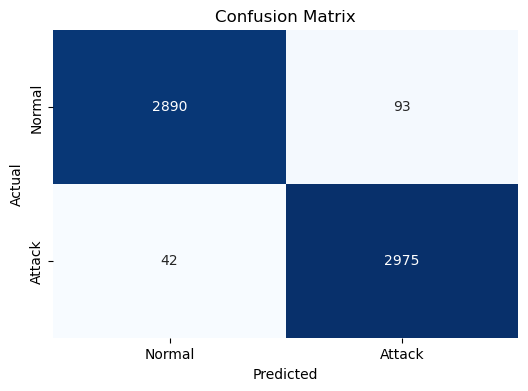

In [60]:
y_test_numeric = y_test.astype(int)

# tính toán
accuracy_knn = accuracy_score(y_test_numeric, y_pred_knn)
conf_matrix = confusion_matrix(y_test_numeric, y_pred_knn)
classification_rep = classification_report(y_test_numeric, y_pred_knn)

# in
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Vẽ sơ đồ ma trận nhầm lãn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC (knn): 0.9774511092633974


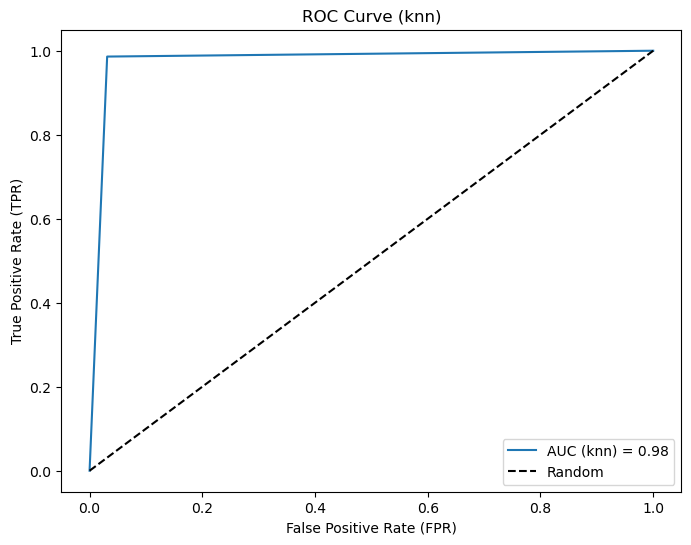

In [61]:
# Tính AUC
auc_knn = roc_auc_score(y_test_numeric, y_pred_knn)
print("AUC (knn):", auc_knn)

# Vẽ đường cong ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_numeric, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC (knn) = {auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (knn)')
plt.legend()
plt.show()

In [62]:
#lstm-2
def lstm_2_model(input_shape):
    model = Sequential()
    # Thêm lớp LSTM với 64 đơn vị
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    # Thêm lớp LSTM với 32 đơn vị
    model.add(LSTM(32))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

In [63]:
input_shape = (X_train_scaled.shape[1], 1)
model = lstm_2_model(input_shape)



In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
438/438 [==============================] - 293s 660ms/step - loss: 0.6875 - accuracy: 0.5224 - val_loss: 0.7449 - val_accuracy: 0.5175
Epoch 2/10
438/438 [==============================] - 252s 575ms/step - loss: 0.6867 - accuracy: 0.5167 - val_loss: 0.6828 - val_accuracy: 0.5315
Epoch 3/10
438/438 [==============================] - 1890s 4s/step - loss: 0.6807 - accuracy: 0.5345 - val_loss: 0.6835 - val_accuracy: 0.5377
Epoch 4/10
438/438 [==============================] - 252s 575ms/step - loss: 0.6809 - accuracy: 0.5319 - val_loss: 0.6803 - val_accuracy: 0.5470
Epoch 5/10
438/438 [==============================] - 247s 565ms/step - loss: 0.6808 - accuracy: 0.5272 - val_loss: 0.6808 - val_accuracy: 0.4998
Epoch 6/10
438/438 [==============================] - 242s 552ms/step - loss: 0.6809 - accuracy: 0.5176 - val_loss: 0.6800 - val_accuracy: 0.4985
Epoch 7/10
438/438 [==============================] - 261s 596ms/step - loss: 0.6798 - accuracy: 0.5125 - val_loss: 0.6781 - v

188/188 [==============================] - 36s 187ms/step
Accuracy:
Confusion Matrix:
[[ 482 2501]
 [ 209 2808]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.16      0.26      2983
           1       0.53      0.93      0.67      3017

    accuracy                           0.55      6000
   macro avg       0.61      0.55      0.47      6000
weighted avg       0.61      0.55      0.47      6000



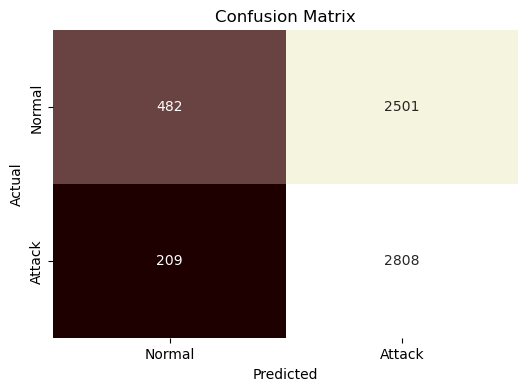

In [65]:
y_pred_proba = model.predict(X_test_scaled)

# Áp đặt ngưỡng (ví dụ: 0.5) để chuyển đổi xác suất thành nhãn dự đoán
threshold = 0.5
y_pred_lstm_2 = (y_pred_proba > threshold).astype(int)

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_lstm_2)

# In ma trận nhầm lẫn
print("Accuracy:")
accuracy_lstm_2 = accuracy_score(y_test, y_pred_lstm_2)
print("Confusion Matrix:")
print(conf_matrix)

# Tính toán và in báo cáo phân loại
classification_rep = classification_report(y_test, y_pred_lstm_2)
print("\nClassification Report:")
print(classification_rep)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False,
            xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC (lstm_2): 0.5461540931703252


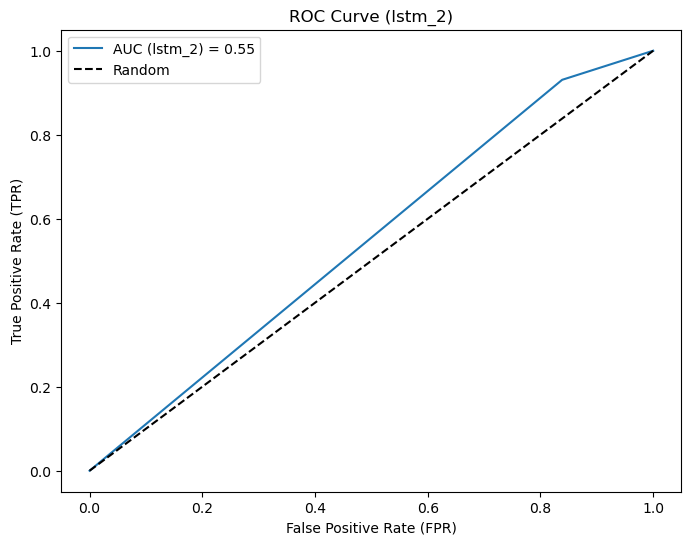

In [66]:
# Tính AUC
auc_lstm_2 = roc_auc_score(y_test, y_pred_lstm_2)
print("AUC (lstm_2):", auc_lstm_2)

# Vẽ đường cong ROC
fpr_lstm_2, tpr_lstm_2, thresholds_lstm_2 = roc_curve(y_test, y_pred_lstm_2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm_2, tpr_lstm_2, label=f'AUC (lstm_2) = {auc_lstm_2:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (lstm_2)')
plt.legend()
plt.show()

In [67]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Mất mát thử nghiệm: {loss:.4f}, Độ chính xác thử nghiệm: {accuracy:.4f}")

188/188 [==============================] - 38s 203ms/step - loss: 0.6746 - accuracy: 0.5483
Mất mát thử nghiệm: 0.6746, Độ chính xác thử nghiệm: 0.5483


In [68]:
#MLP
# Khởi tạo và huấn luyện mô hình MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_encoded, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

D:\anacoda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9873333333333333
Confusion Matrix:
 [[2941   42]
 [  34 2983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2983
           1       0.99      0.99      0.99      3017

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



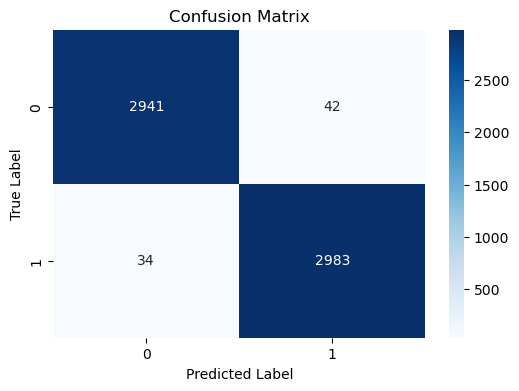

In [69]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Tính toán và in kết quả
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp, zero_division=1)


print("Accuracy:", accuracy_mlp)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep_mlp)


# Vẽ sơ đồ ma trận
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC (mlp): 0.9873253707813505


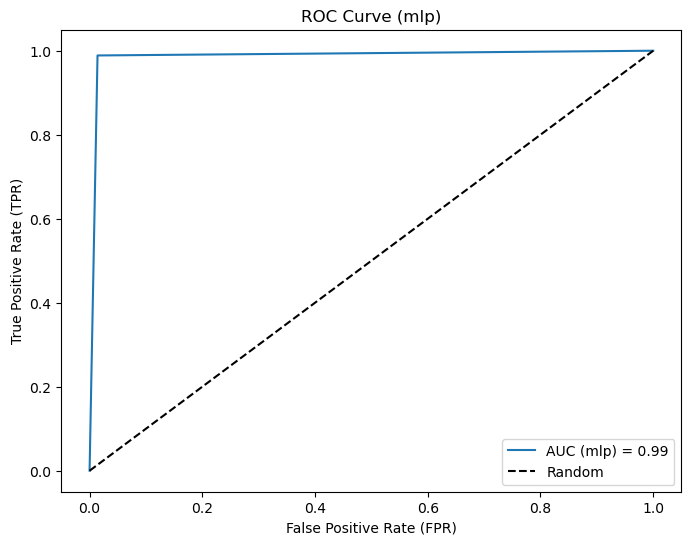

In [70]:
# Tính AUC
auc_mlp = roc_auc_score(y_test, y_pred_mlp)
print("AUC (mlp):", auc_mlp)

# Vẽ đường cong ROC
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC (mlp) = {auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (mlp)')
plt.legend()
plt.show()

In [71]:
#svm
# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

Accuracy (SVM): 0.989
Confusion Matrix (SVM):
 [[2935   48]
 [  18 2999]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2983
           1       0.98      0.99      0.99      3017

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



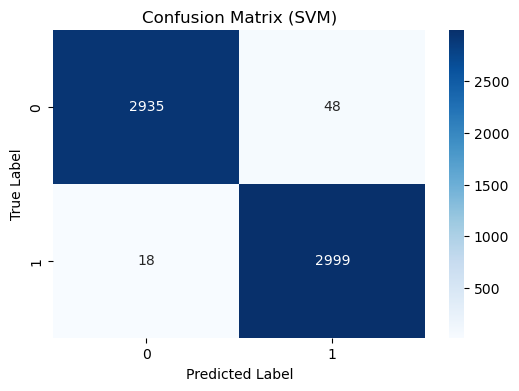

In [72]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled)

# Tính toán và in kết quả
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=1)

print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Classification Report (SVM):\n", classification_rep_svm)

# Vẽ sơ đồ ma trận
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AUC (SVM): 0.9889713125232578


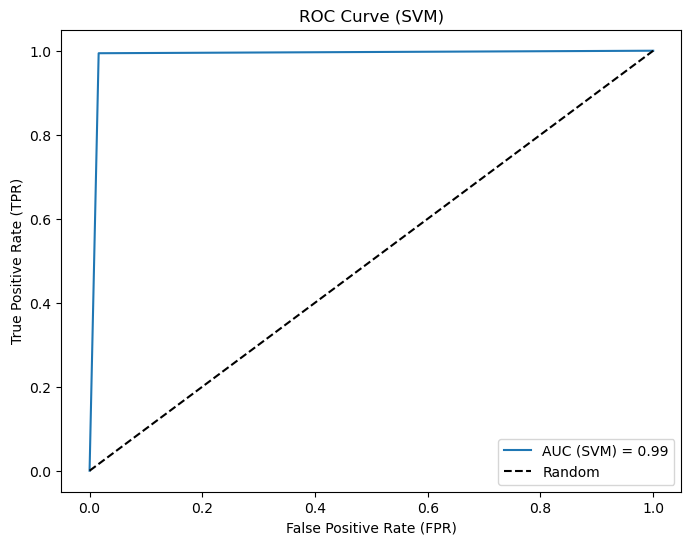

Accuracy (SVM): 0.989
Confusion Matrix (SVM):
 [[2935   48]
 [  18 2999]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2983
           1       0.98      0.99      0.99      3017

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [73]:
# Tính AUC
auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC (SVM):", auc_svm)

# Vẽ đường cong ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.show()

# In kết quả
print("Accuracy (SVM):", accuracy_svm)
print("Confusion Matrix (SVM):\n", conf_matrix_svm)
print("Classification Report (SVM):\n", classification_rep_svm)

 Kết quả AUC :
   Thuật toán       AUC
0  lstm_fuzzy  1.000000
1         knn  0.977451
2         mlp  0.987325
3      lstm_2  0.546154
4         SVM  0.988971


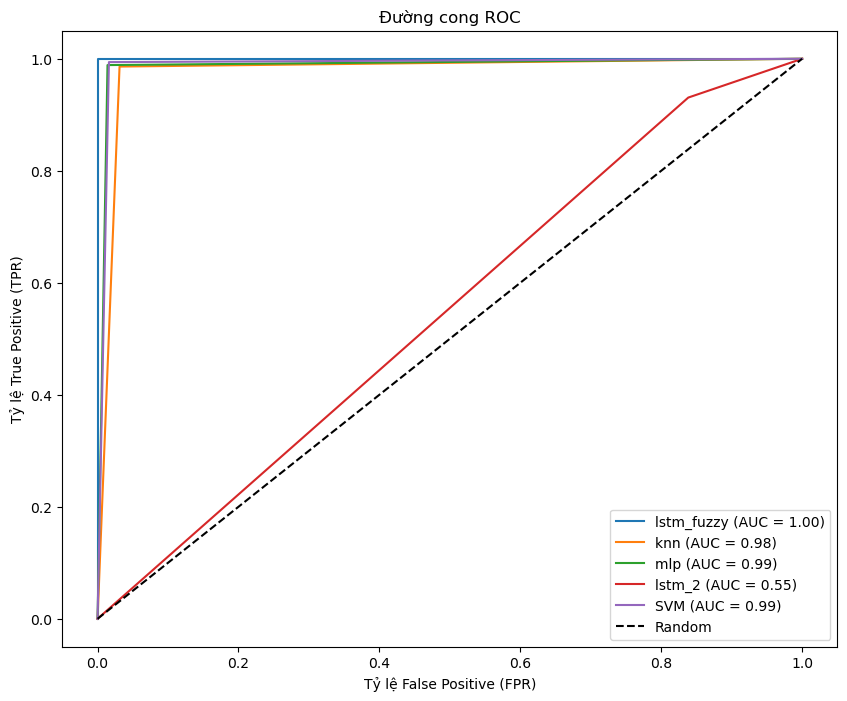

In [74]:
import pandas as pd

# Tạo DataFrame chứa kết quả AUC
data = {
    'Thuật toán': ['lstm_fuzzy', 'knn', 'mlp', 'lstm_2', 'SVM'],
    'AUC': [auc_lstm_fuzzy, auc_knn, auc_mlp, auc_lstm_2, auc_svm]
}

df_auc = pd.DataFrame(data)

# In bảng kết quả AUC
print(" Kết quả AUC :")
print(df_auc)

# Vẽ đường cong ROC trên cùng một đồ thị
plt.figure(figsize=(10, 8))

# Đường cong ROC cho lstm_fuzzy
plt.plot(fpr_lstm_fuzzy, tpr_lstm_fuzzy, label=f'lstm_fuzzy (AUC = {auc_lstm_fuzzy:.2f})')

# Đường cong ROC cho knn
plt.plot(fpr_knn, tpr_knn, label=f'knn (AUC = {auc_knn:.2f})')

# Đường cong ROC cho mlp
plt.plot(fpr_mlp, tpr_mlp, label=f'mlp (AUC = {auc_mlp:.2f})')

# Đường cong ROC cho lstm_2
plt.plot(fpr_lstm_2, tpr_lstm_2, label=f'lstm_2 (AUC = {auc_lstm_2:.2f})')

# Đường cong ROC cho SVM
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Đường đường chéo thể hiện dự đoán ngẫu nhiên
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('Tỷ lệ False Positive (FPR)')
plt.ylabel('Tỷ lệ True Positive (TPR)')
plt.title('Đường cong ROC')
plt.legend()
plt.show()

D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Pre

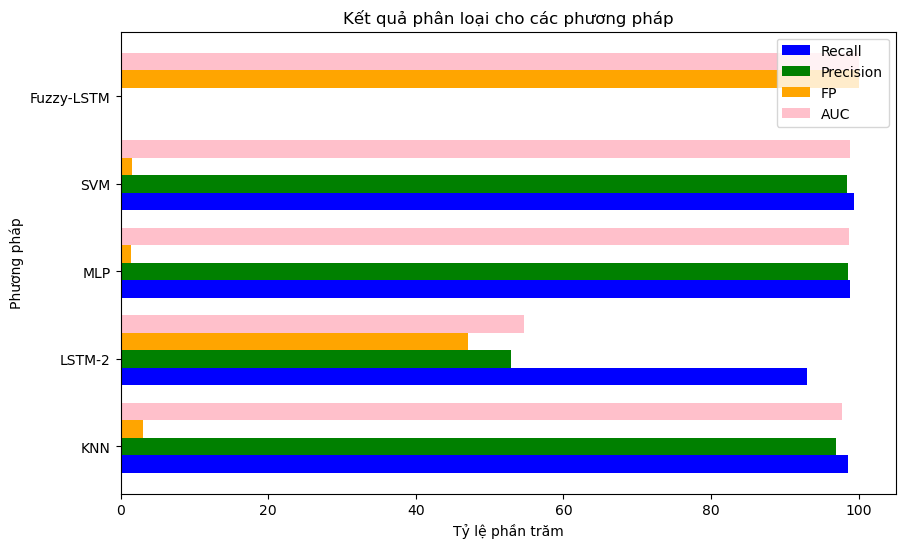

In [75]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import precision_recall_fscore_support


# Lấy kết quả từ classification_report
classification_rep_svm = classification_report(y_test, y_pred_svm, zero_division=1)
classification_rep_mlp = classification_report(y_test, y_pred_mlp, zero_division=1)
classification_rep_knn = classification_report(y_test, y_pred_knn)
classification_rep_fuzzy_lstm = classification_report(y_test, y_pred_fuzzy_lstm)
classification_rep_lstm_2 = classification_report(y_test, y_pred_lstm_2)
# Lấy giá trị Precision, Recall và F1-score
precision_svm, recall_svm, f1_score_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
precision_mlp, recall_mlp, f1_score_mlp, _ = precision_recall_fscore_support(y_test, y_pred_mlp, average='binary')
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='binary')
precision_fuzzy_lstm, recall_fuzzy_lstm, f1_score_fuzzy_lstm, _ = precision_recall_fscore_support(y_test, y_pred_fuzzy_lstm, average='binary')
precision_fuzzy_lstm_2, recall_fuzzy_lstm_2, f1_score_fuzzy_lstm_2, _ = precision_recall_fscore_support(y_test, y_pred_lstm_2, average='binary')

#auc
auc_lstm_2 = roc_auc_score(y_test, y_pred_lstm_2)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_lstm_fuzzy = roc_auc_score(y_test, result_binary)
auc_knn = roc_auc_score(y_test_numeric, y_pred_knn)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)
# Dữ liệu
methods = ['KNN', 'LSTM-2', 'MLP','SVM','Fuzzy-LSTM']
recall_values = [recall_knn*100, recall_fuzzy_lstm_2*100,recall_mlp*100,recall_svm*100,recall_fuzzy_lstm*100]
precision_values = [precision_knn*100, precision_fuzzy_lstm_2*100, precision_mlp*100,precision_svm*100,precision_fuzzy_lstm*100]
FP_values = [(1-precision_knn)*100, (1-precision_fuzzy_lstm_2)*100, (1-precision_mlp)*100,(1-precision_svm)*100,(1-precision_fuzzy_lstm)*100]
auc_values = [auc_knn*100,auc_lstm_2*100,auc_mlp*100,auc_svm*100,auc_lstm_fuzzy*100]

# Vẽ biểu đồ cột nằm ngang
bar_height = 0.2
index = np.arange(len(methods))

plt.figure(figsize=(10, 6))

plt.barh(index, recall_values, bar_height, label='Recall', color='blue')
plt.barh(index + bar_height, precision_values, bar_height, label='Precision', color='green')
plt.barh(index + 2 * bar_height, FP_values, bar_height, label='FP', color='orange')
plt.barh(index + 3 * bar_height, auc_values, bar_height, label='AUC', color='pink')

plt.ylabel('Phương pháp')
plt.xlabel('Tỷ lệ phần trăm')
plt.title('Kết quả phân loại cho các phương pháp')
plt.yticks(index + bar_height, methods)
plt.legend()

plt.show()



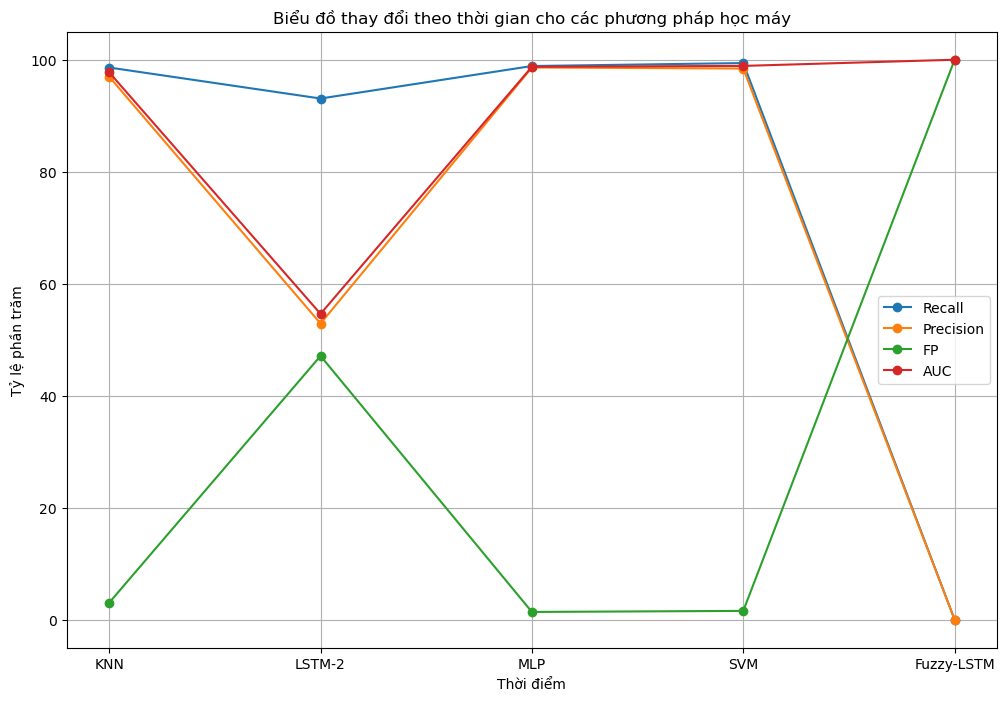

In [76]:
# Dữ liệu
methods = ['KNN', 'LSTM-2', 'MLP','SVM','Fuzzy-LSTM']
recall_values = [recall_knn*100, recall_fuzzy_lstm_2*100,recall_mlp*100,recall_svm*100,recall_fuzzy_lstm*100]
precision_values = [precision_knn*100, precision_fuzzy_lstm_2*100, precision_mlp*100,precision_svm*100,precision_fuzzy_lstm*100]
FP_values = [(1-precision_knn)*100, (1-precision_fuzzy_lstm_2)*100, (1-precision_mlp)*100,(1-precision_svm)*100,(1-precision_fuzzy_lstm)*100]
auc_values = [auc_knn*100,auc_lstm_2*100,auc_mlp*100,auc_svm*100,auc_lstm_fuzzy*100]

# Thời gian (giả sử là có 5 thời điểm)
time_points = np.arange(5)

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 8))

plt.plot(time_points, recall_values, marker='o', label='Recall')
plt.plot(time_points, precision_values, marker='o', label='Precision')
plt.plot(time_points, FP_values, marker='o', label='FP')
plt.plot(time_points, auc_values, marker='o', label='AUC')

plt.xlabel('Thời điểm')
plt.ylabel('Tỷ lệ phần trăm')
plt.title('Biểu đồ thay đổi theo thời gian cho các phương pháp học máy')
plt.xticks(time_points, methods)  # Đặt nhãn cho trục x
plt.legend()
plt.grid(True)
plt.show()


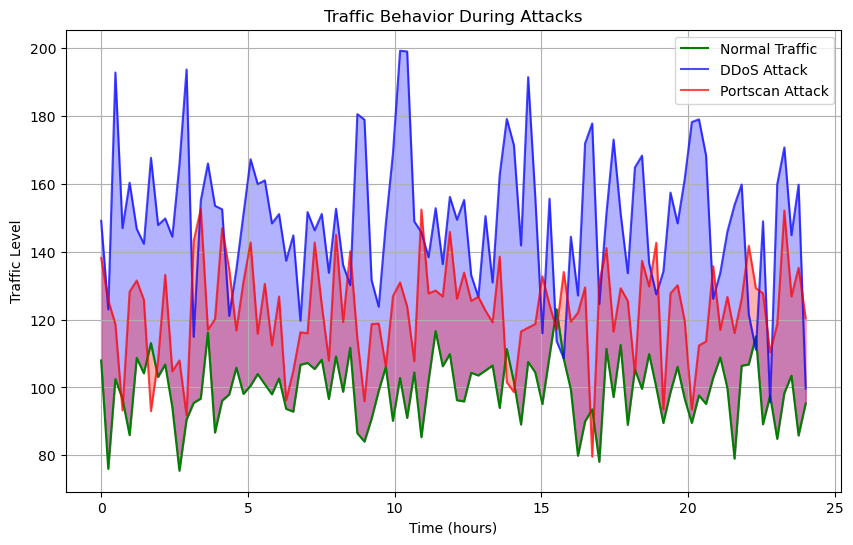

In [77]:
# Tạo dữ liệu giả định
time_points = np.linspace(0, 24, 100)  # Thời gian trong 1 ngày (giả sử)
normal_traffic = np.random.normal(loc=100, scale=10, size=100)  # Lưu lượng bình thường
ddos_attack = np.random.normal(loc=150, scale=20, size=100)  # Lưu lượng tấn công DDoS
portscan_attack = np.random.normal(loc=120, scale=15, size=100)  # Lưu lượng tấn công Portscan

# Tạo Biểu Đồ Diện Tích
plt.figure(figsize=(10, 6))

plt.plot(time_points, normal_traffic, label='Normal Traffic', color='green')
plt.plot(time_points, ddos_attack, label='DDoS Attack', color='blue', alpha=0.7)
plt.plot(time_points, portscan_attack, label='Portscan Attack', color='red', alpha=0.7)

plt.fill_between(time_points, normal_traffic, ddos_attack, color='blue', alpha=0.3)
plt.fill_between(time_points, normal_traffic, portscan_attack, color='red', alpha=0.3)

plt.title('Traffic Behavior During Attacks')
plt.xlabel('Time (hours)')
plt.ylabel('Traffic Level')
plt.legend()
plt.grid(True)
plt.show()

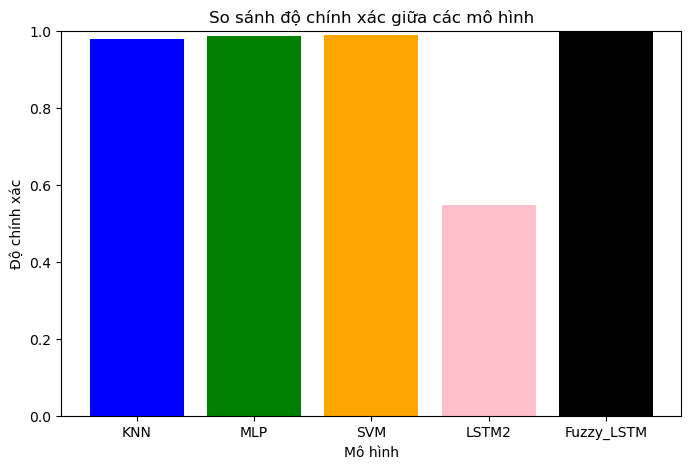

In [78]:
# Độ chính xác từ các mô hình (thay thế bằng giá trị thực tế của bạn)
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm,accuracy_lstm_2,accuracy_fuzzy_lstm_1]
models = ['KNN', 'MLP', 'SVM','LSTM2','Fuzzy_LSTM']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange','pink','black'])
plt.title('So sánh độ chính xác giữa các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)  # Đảm bảo trục y từ 0 đến 1
plt.show()

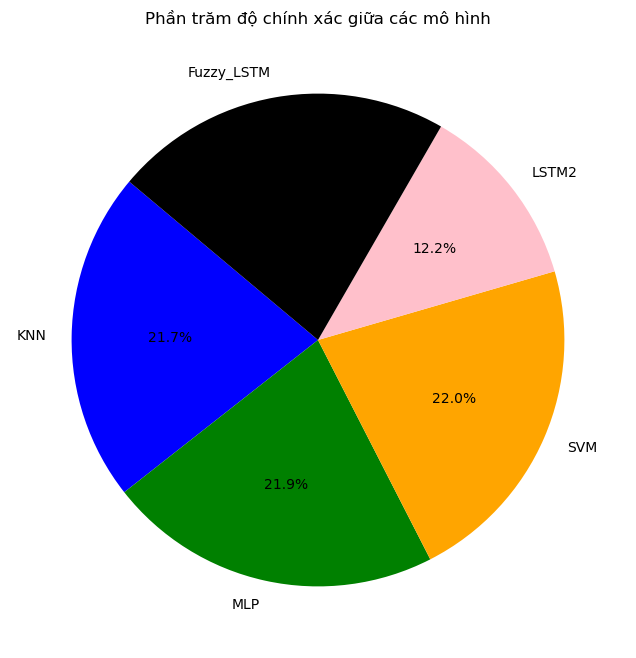

In [79]:
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm, accuracy_lstm_2, accuracy_fuzzy_lstm_1]
models = ['KNN', 'MLP', 'SVM', 'LSTM2', 'Fuzzy_LSTM']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'pink', 'black'], startangle=140)
plt.title('Phần trăm độ chính xác giữa các mô hình')
plt.show()

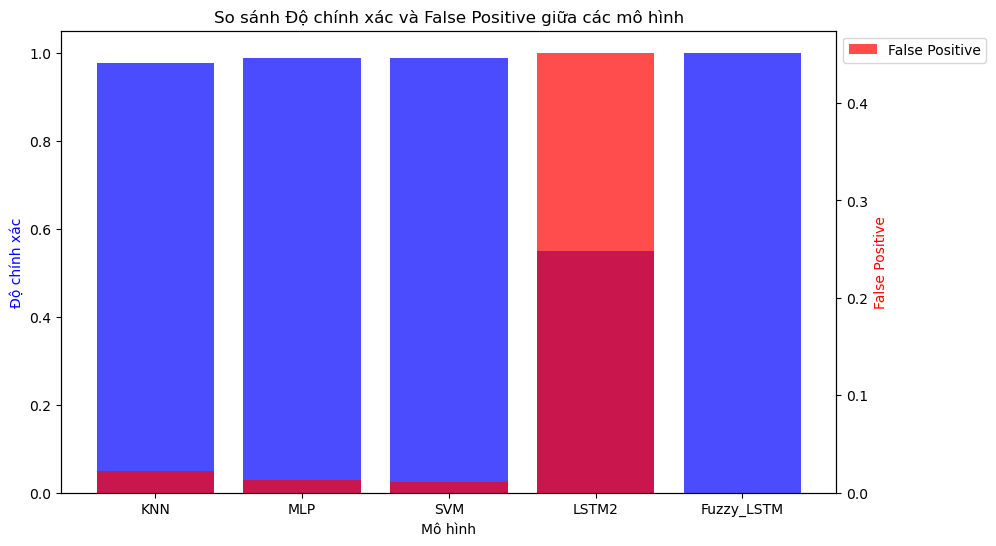

In [80]:
# Độ chính xác và số lượng False Positive từ các mô hình (thay thế bằng giá trị thực tế của bạn)
accuracies = [accuracy_knn, accuracy_mlp, accuracy_svm, accuracy_lstm_2, accuracy_fuzzy_lstm_1]
fps = [1 - acc for acc in accuracies]  # Tính False Positive

models = ['KNN', 'MLP', 'SVM', 'LSTM2', 'Fuzzy_LSTM']

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ cột cho độ chính xác
ax1.bar(models, accuracies, color='blue', alpha=0.7, label='Accuracy')

# Biểu đồ cột cho False Positive
ax2 = ax1.twinx()
ax2.bar(models, fps, color='red', alpha=0.7, label='False Positive')

# Đặt các nhãn và tiêu đề
ax1.set_xlabel('Mô hình')
ax1.set_ylabel('Độ chính xác', color='blue')
ax2.set_ylabel('False Positive', color='red')

# Hiển thị chú thích
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('So sánh Độ chính xác và False Positive giữa các mô hình')
plt.show()